# EE 511 Assignment 4 - PartI
University of Washington<br>
Code by John Ragland and Doruk Arisoy<br>
Winter 2021

In [2]:
# Suppress Warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import numpy as np
import tools
import matplotlib.pyplot as plt
import torch
import torch.nn as nn 
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

# Some magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Generate samples

In [3]:
x1_train, x2_train, labels_train = tools.generate_data(500) 
np.bincount(labels_train) / 500.0

array([0.208, 0.1  , 0.458, 0.234])

In [4]:
x1_valid, x2_valid, labels_valid = tools.generate_data(500) 
np.bincount(labels_valid) / 500.0

array([0.194, 0.086, 0.484, 0.236])

In [5]:
x1_test, x2_test, labels_test = tools.generate_data(1000) 
np.bincount(labels_test) / 500.0

array([0.414, 0.162, 0.956, 0.468])

In [6]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 15)
        self.fc2 = nn.Linear(15, 4)

    def forward(self, x):
        x = F.tanh(self.fc1(x))
        x = self.fc2(x)
        return x

In [81]:
BATCH_SIZE = 10
TEST_BATCH_SIZE = 1000
EPOCHS = 140
LEARNING_RATE = 0.15
MOMENTUM = 0.5
SEED = 0
LOG_INTERVAL = 100

In [82]:
torch.manual_seed(SEED)
device = torch.device("cpu")
print('Using device', device)
import multiprocessing
print('num cpus:', multiprocessing.cpu_count()) 
criterion = nn.CrossEntropyLoss()

Using device cpu
num cpus: 4


In [83]:
data_train = torch.Tensor(np.array([x1_train, x2_train]).T)
data_train = TensorDataset(data_train, torch.tensor(labels_train, dtype=torch.long, device=device))
data_valid = torch.Tensor(np.array([x1_valid, x2_valid]).T)
data_valid = TensorDataset(data_valid, torch.tensor(labels_valid, dtype=torch.long, device=device))
data_test = torch.Tensor(np.array([x1_test, x2_test]).T)
data_test = TensorDataset(data_test, torch.tensor(labels_test, dtype=torch.long, device=device))

train_loader = DataLoader(dataset = data_train, batch_size = BATCH_SIZE, shuffle = True) 
valid_loader = DataLoader(dataset = data_valid, batch_size = BATCH_SIZE,  shuffle = False)
test_loader = DataLoader(dataset = data_test, batch_size = BATCH_SIZE,  shuffle = False)

In [34]:
best_lr = 0
best_result = 0
for lr in np.arange(0, 0.2, 0.01):
    model = Net()
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=MOMENTUM)
    tools.train(model, device, train_loader, optimizer, EPOCHS, LOG_INTERVAL, criterion)
    result = tools.test(model, device, valid_loader, criterion)
    if result > best_result:
        best_result = result
        best_lr = lr

LEARNING_RATE = best_lr
print('Best learning rate %.2f' % LEARNING_RATE)

Test set: Average loss: 0.1351, Accuracy: 155/500 (31%)
Test set: Average loss: 0.1166, Accuracy: 240/500 (48%)
Test set: Average loss: 0.1063, Accuracy: 244/500 (49%)
Test set: Average loss: 0.0952, Accuracy: 291/500 (58%)
Test set: Average loss: 0.0810, Accuracy: 310/500 (62%)
Test set: Average loss: 0.0803, Accuracy: 304/500 (61%)
Test set: Average loss: 0.0742, Accuracy: 355/500 (71%)
Test set: Average loss: 0.0746, Accuracy: 325/500 (65%)
Test set: Average loss: 0.0753, Accuracy: 319/500 (64%)
Test set: Average loss: 0.0762, Accuracy: 346/500 (69%)
Test set: Average loss: 0.0729, Accuracy: 355/500 (71%)
Test set: Average loss: 0.0639, Accuracy: 367/500 (73%)
Test set: Average loss: 0.0692, Accuracy: 362/500 (72%)
Test set: Average loss: 0.0678, Accuracy: 341/500 (68%)
Test set: Average loss: 0.0714, Accuracy: 360/500 (72%)
Test set: Average loss: 0.0624, Accuracy: 380/500 (76%)
Test set: Average loss: 0.0654, Accuracy: 395/500 (79%)
Test set: Average loss: 0.0643, Accuracy: 389/50

In [46]:
best_epoch = 0
best_result = 0
for epoch in np.arange(0, 200, 10):
    model = Net()
    optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=MOMENTUM)
    tools.train(model, device, train_loader, optimizer, epoch, LOG_INTERVAL, criterion)
    result = tools.test(model, device, valid_loader, criterion)
    if result > best_result:
        best_result = result
        best_epoch = epoch

EPOCHS = best_epoch
print('Best number of epochs %.2f' % EPOCHS)

Test set: Average loss: 0.1225, Accuracy: 242/500 (48%)
Test set: Average loss: 0.0943, Accuracy: 302/500 (60%)
Test set: Average loss: 0.0799, Accuracy: 327/500 (65%)
Test set: Average loss: 0.0747, Accuracy: 370/500 (74%)
Test set: Average loss: 0.0731, Accuracy: 331/500 (66%)
Test set: Average loss: 0.0586, Accuracy: 385/500 (77%)
Test set: Average loss: 0.0710, Accuracy: 342/500 (68%)
Test set: Average loss: 0.0592, Accuracy: 389/500 (78%)
Test set: Average loss: 0.0691, Accuracy: 340/500 (68%)
Test set: Average loss: 0.0688, Accuracy: 373/500 (75%)
Test set: Average loss: 0.0606, Accuracy: 380/500 (76%)
Test set: Average loss: 0.0617, Accuracy: 371/500 (74%)
Test set: Average loss: 0.0585, Accuracy: 382/500 (76%)
Test set: Average loss: 0.0492, Accuracy: 414/500 (83%)
Test set: Average loss: 0.0453, Accuracy: 439/500 (88%)
Test set: Average loss: 0.0603, Accuracy: 364/500 (73%)
Test set: Average loss: 0.0636, Accuracy: 368/500 (74%)
Test set: Average loss: 0.0458, Accuracy: 422/50

In [84]:
model = Net()
optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=MOMENTUM)
tools.train(model, device, train_loader, optimizer, EPOCHS, LOG_INTERVAL, criterion)

## Evaluation

In [85]:
tools.test(model, device, test_loader, criterion)

Test set: Average loss: 0.0487, Accuracy: 811/1000 (81%)


81.1

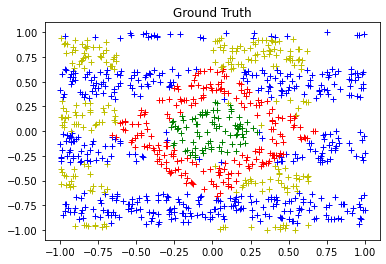

In [78]:
plt.title("Ground Truth")
tools.plot(x1_test, x2_test, labels_test)

In [87]:
pred = torch.Tensor(np.array([x1_test, x2_test]).T)
output = model(pred)
pred = output.max(1, keepdim=True)[1]

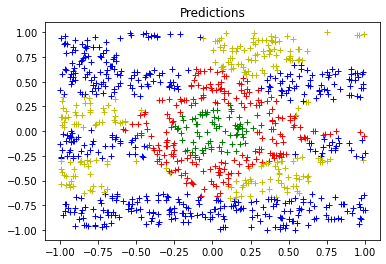

In [88]:
plt.title("Predictions")
tools.plot(x1_test, x2_test, pred)